In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import graphviz

# 머신러닝
from sklearn import datasets, svm, neighbors, tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import (
    BaggingRegressor, BaggingClassifier, 
    RandomForestClassifier, RandomForestRegressor, 
    AdaBoostClassifier, AdaBoostRegressor
)

# 가상의 데이터 생성
- 그림을 그리기 위해서 이렇게 합니다. 
- 실제 데이터들은 입력데이터의 차원이 높다(변수가 많다는 뜻)
    - 그림을 그릴 수 없다. 

## 분류 데이터

In [3]:
# xy, labels = datasets.make_blobs(n_samples=50, n_class, random_state=123)
xy, xy_labels = datasets.make_classification(
    n_samples=50, n_features=2, n_informative=1, n_redundant=0, 
    n_clusters_per_class=1, n_classes=2, random_state=123
)

xyz, xyz_labels = datasets.make_classification(
    n_samples=50, n_features=2, n_informative=2, n_redundant=0, 
    n_clusters_per_class=1, n_classes=3, random_state=1234
)

- 입력차원이 2임을 가정한 데이터로 ($x_1, x_2$) 정도로 생각
- 레이블이 2(binary classification)인 데이터와 레이블이 3(multi classifiaction)인 데이터

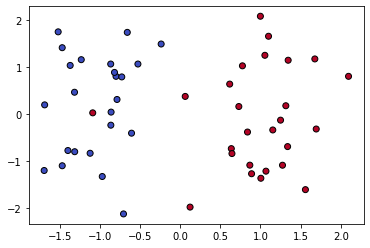

In [3]:
plt.scatter(xy[:,0], xy[:,1], cmap='coolwarm', edgecolors='k', c=xy_labels)
plt.show()

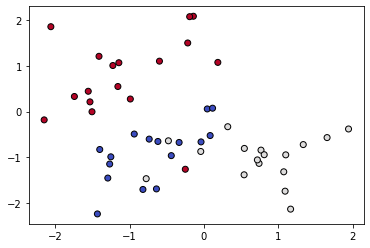

In [4]:
plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.show()

## 회귀 데이터

In [5]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(50, 1), axis=0)
Y = np.cos(np.pi * X).flatten() + np.sin(np.pi * X).flatten() + np.random.rand(len(X))
newX = np.linspace(0, 5, 1000).reshape(1000, 1) # 회귀선을 그리는 용도

In [6]:
print(X.shape, Y.shape, newX.shape)

(50, 1) (50,) (1000, 1)


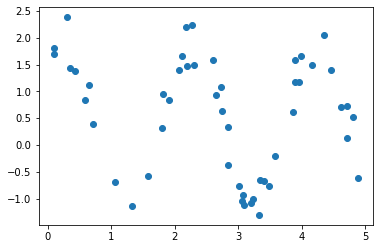

In [7]:
plt.plot(X, Y, 'o')
plt.show()

# Ensemble
- 앙상블
- 하나의 모형을 이용하지 않고, 여러개의 모형을 이용해서 정확도를 높이는 방법
- 주로, 결정트리가 주로 많이 사용이 된다. 
- 어떤 모형이든 사용이 가능

# Bagging
- Bootstrap Aggregating

## 회귀 데이터

### Bootstrapping
- Cross Validation과는 다르게 원본 데이터 셋에서, 중복이 가능한 여러개의 샘플 데이터 셋을 이용한 방법
- 배깅과 부스팅 모두에 동일하게 사용

In [8]:
bagging = []
for _ in range(10):
    idx = [x for x in range(X.shape[0])]
    sampling = np.random.choice(idx, X.shape[0] // 2, replace=False)
    bagging.append(sampling)

In [9]:
bagging

[array([15, 38, 46, 10, 12, 37, 18, 20, 17,  7,  5,  6,  9, 29, 24, 33,  0,
        39,  1, 41, 23, 35, 21, 16, 47]),
 array([ 4, 34, 49,  0, 48,  6, 28, 26, 13, 40, 25, 47, 42, 17, 27, 16,  9,
         7, 30, 41, 14, 46, 21, 39, 19]),
 array([ 9, 44, 10,  4, 46, 21, 23, 39, 13, 48, 26, 45, 19, 31, 14,  6, 43,
        28,  7, 15, 42, 22, 12, 49, 41]),
 array([ 2,  1, 21, 15, 44, 12, 48, 35, 31,  5, 39, 34, 25, 18, 37,  6, 47,
        14, 10, 42,  4, 11, 46, 20, 38]),
 array([19, 48, 14, 38,  5, 40, 21, 11, 39, 42, 20,  0, 12,  2, 33,  4, 31,
        17, 29,  3, 47, 15, 22, 45, 28]),
 array([46, 24, 40,  5, 44, 21, 38, 45, 41, 43, 35, 14, 18, 49, 32,  2, 12,
        42, 26, 39,  6, 31, 11,  8, 13]),
 array([18,  1, 16, 44, 13, 31, 15, 10,  2, 37, 42, 45, 29, 17, 24, 14, 22,
        36, 23, 43, 25, 41, 11, 47,  0]),
 array([40, 42, 34, 21, 48, 18,  1, 43,  5, 38,  7, 11, 46,  0,  8, 10, 24,
        16, 14, 49, 19, 31, 37, 12, 25]),
 array([42, 23, 47, 34, 22,  7, 39, 13,  4,  9, 19, 20, 

### SVR 모형

In [10]:
bagging_predict = []
for idx in bagging:
    train = X[idx]
    test = Y[idx]
    model = svm.SVR(kernel='rbf', C=100, gamma=0.5).fit(train, test)
    predict = model.predict(newX)
    bagging_predict.append(predict)

In [11]:
len(bagging_predict) # 0 ~ 9까지의 10개의 서브샘플셋에서의 예측값

10

In [15]:
bagging_predict[3] # 0 ~ 9까지의 10개의 서브샘플셋에서의 예측값

array([ 1.64311463e+00,  1.65350777e+00,  1.66364312e+00,  1.67351881e+00,
        1.68313300e+00,  1.69248389e+00,  1.70156971e+00,  1.71038876e+00,
        1.71893937e+00,  1.72721990e+00,  1.73522876e+00,  1.74296443e+00,
        1.75042539e+00,  1.75761020e+00,  1.76451744e+00,  1.77114576e+00,
        1.77749385e+00,  1.78356043e+00,  1.78934429e+00,  1.79484424e+00,
        1.80005918e+00,  1.80498802e+00,  1.80962973e+00,  1.81398335e+00,
        1.81804793e+00,  1.82182261e+00,  1.82530656e+00,  1.82849900e+00,
        1.83139921e+00,  1.83400652e+00,  1.83632030e+00,  1.83834000e+00,
        1.84006509e+00,  1.84149512e+00,  1.84262968e+00,  1.84346840e+00,
        1.84401100e+00,  1.84425723e+00,  1.84420689e+00,  1.84385985e+00,
        1.84321603e+00,  1.84227540e+00,  1.84103798e+00,  1.83950388e+00,
        1.83767321e+00,  1.83554620e+00,  1.83312307e+00,  1.83040416e+00,
        1.82738982e+00,  1.82408047e+00,  1.82047659e+00,  1.81657873e+00,
        1.81238748e+00,  

In [16]:
bagging_mean_predict = []
for i in range(newX.shape[0]):
    total = []
    for bag in bagging_predict:
        total.append(bag[i])
    # print(np.mean(total))
    bagging_mean_predict.append(np.mean(total))

In [17]:
print(
    bagging_predict[0][0], bagging_predict[1][0], bagging_predict[2][0],
    bagging_predict[3][0], bagging_predict[4][0], bagging_predict[5][0],
    bagging_predict[6][0], bagging_predict[7][0], bagging_predict[8][0],
    bagging_predict[9][0]
)

print(
    bagging_predict[0][0]+bagging_predict[1][0]+bagging_predict[2][0]+
    bagging_predict[3][0]+bagging_predict[4][0]+bagging_predict[5][0]+
    bagging_predict[6][0]+bagging_predict[7][0]+bagging_predict[8][0]+
    bagging_predict[9][0]
)

print(
    (bagging_predict[0][0]+bagging_predict[1][0]+bagging_predict[2][0]+
    bagging_predict[3][0]+bagging_predict[4][0]+bagging_predict[5][0]+
    bagging_predict[6][0]+bagging_predict[7][0]+bagging_predict[8][0]+
    bagging_predict[9][0]) / 10
)

1.6586509687366882 1.80236665342898 1.8631460929145454 1.6431146316041598 1.9334473326253825 2.9471796879451193 1.3807331136282592 1.7524961091080549 1.3150873928485987 1.8291664965091112
18.1253884793489
1.8125388479348898


In [17]:
bagging_mean_predict[:5]

[1.8125388479348898,
 1.8203644343241119,
 1.8279527274163059,
 1.8353021169699797,
 1.8424110285454645]

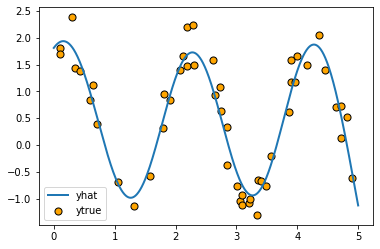

In [18]:
plt.scatter(X, Y, s=50, edgecolors='black', c='orange', label='ytrue')
plt.plot(newX, bagging_mean_predict, label='yhat', linewidth=2)
plt.legend()
plt.show()

### Decision Tree + Bagging

In [21]:
tree_model = tree.DecisionTreeRegressor(max_depth=5)
bagging_model = BaggingRegressor(
    base_estimator=tree_model,
    n_estimators= 10, #10번 샘플링
    verbose= 1 # 과정 출력
).fit(X, Y) # 라이브러리 내에서 부트스트래핑이 진행되므로, 원본 데이터를 그대로 입력

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [22]:
yhat = bagging_model.predict(newX)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


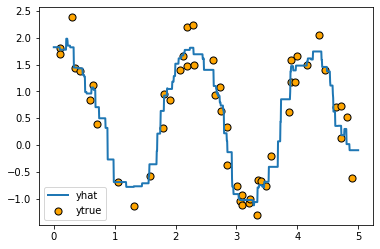

In [23]:
plt.scatter(X, Y, s=50, edgecolors='black', c='orange', label='ytrue')
plt.plot(newX, yhat, label='yhat', linewidth=2)
plt.legend()
plt.show()

## 분류 데이터

### Decision Tree + bagging

In [21]:
tree_model = tree.DecisionTreeClassifier()
bagging_model = BaggingClassifier(
    base_estimator=tree_model,
    n_estimators= 100, #10번 샘플링
    verbose= 1 # 과정 출력
).fit(xyz, xyz_labels) # 라이브러리 내에서 부트스트래핑이 진행되므로, 원본 데이터를 그대로 입력

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


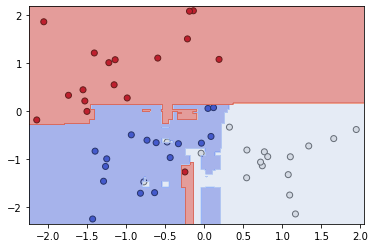

In [22]:
xx, yy = np.meshgrid(
    np.arange(xyz[:,0].min() - 0.1, xyz[:,0].max() + 0.1, 0.01), 
    np.arange(xyz[:,1].min() - 0.1, xyz[:,1].max() + 0.1 , 0.01)
)

yhat = bagging_model.predict(np.c_[xx.flatten(), yy.flatten()])

plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.contourf(xx, yy, yhat.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.show()

## RandomForest
- Decision Tree에 Bagging의 아이디어를 접목한 알고리즘

In [30]:
model = RandomForestRegressor( 
    n_estimators= 500, 
    # max_depth=5,
    random_state=123
).fit(X, Y)

In [31]:
yhat = model.predict(newX)

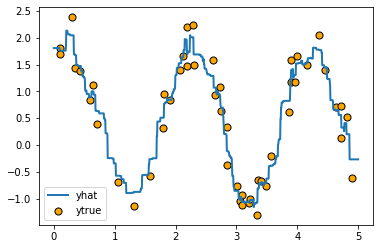

In [32]:
plt.scatter(X, Y, s=50, edgecolors='black', c='orange', label='ytrue')
plt.plot(newX, yhat, label='yhat', linewidth=2)
plt.legend()
plt.show()

In [23]:
model = RandomForestClassifier(
    n_estimators= 500, 
    random_state=123
).fit(xyz, xyz_labels)

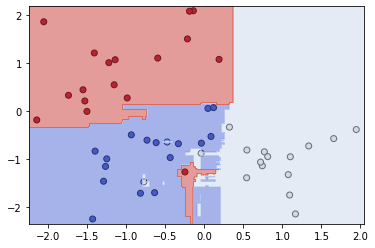

In [24]:
xx, yy = np.meshgrid(
    np.arange(xyz[:,0].min() - 0.1, xyz[:,0].max() + 0.1, 0.01), 
    np.arange(xyz[:,1].min() - 0.1, xyz[:,1].max() + 0.1 , 0.01)
)

yhat = model.predict(np.c_[xx.flatten(), yy.flatten()])

plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.contourf(xx, yy, yhat.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.show()

# Boosting
- 결정트리가 주로 많이 사용
- 다른 모델을 사용하는 것도 가능

## AdaBoost

In [40]:
tree_model = tree.DecisionTreeClassifier()
model = AdaBoostClassifier(
    base_estimator=tree_model,
    n_estimators=300,
    random_state=123
).fit(xyz, xyz_labels)

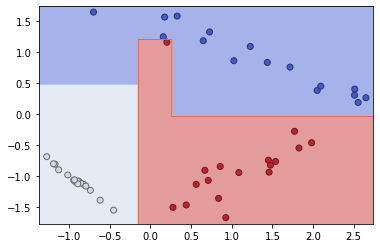

In [41]:
xx, yy = np.meshgrid(
    np.arange(xyz[:,0].min() - 0.1, xyz[:,0].max() + 0.1, 0.01), 
    np.arange(xyz[:,1].min() - 0.1, xyz[:,1].max() + 0.1 , 0.01)
)

yhat = model.predict(np.c_[xx.flatten(), yy.flatten()])

plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.contourf(xx, yy, yhat.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.show()

## XGBoost
- Gradient Boosting

In [42]:
!pip install xgboost

     |████████████████████████████████| 157.5 MB 2.8 kB/s  eta 0:00:01  |▋                               | 3.1 MB 2.3 MB/s eta 0:01:08     |█████████                       | 44.1 MB 29.9 MB/s eta 0:00:04     |██████████████▋                 | 71.6 MB 78.0 MB/s eta 0:00:02     |███████████████▏                | 74.5 MB 78.0 MB/s eta 0:00:02     |███████████████▊                | 77.3 MB 78.0 MB/s eta 0:00:02


In [45]:
len(set(xyz_labels))

3

In [70]:
import xgboost as xgb

params = {
    'max_depth': 100,
    'learning_rate': 0.01, 
    'n_estimators': 300, # 생성할 트리의 갯수(샘플의 갯수)
    'objective': 'multi:softmax', 
    'num_class': 3
}
xgb_train = xgb.DMatrix(data = xyz, label=xyz_labels)
model = xgb.train(params=params, dtrain=xgb_train)

# model = xgb.XGBClassifier(
#     max_depth=100, learning_rate=0.01,  
#     n_estimators=300, objective='multi:softmax', num_class=3
# ).fit(xyz, xyz_labels)

[11:52:43] WARNING: ../src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:52:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


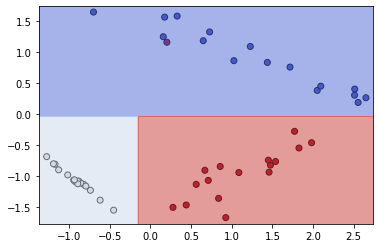

In [71]:
xx, yy = np.meshgrid(
    np.arange(xyz[:,0].min() - 0.1, xyz[:,0].max() + 0.1, 0.01), 
    np.arange(xyz[:,1].min() - 0.1, xyz[:,1].max() + 0.1 , 0.01)
)

# yhat = model.predict(np.c_[xx.flatten(), yy.flatten()])
xgb_test = xgb.DMatrix(data=np.c_[xx.flatten(), yy.flatten()])
yhat = model.predict(xgb_test)

plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.contourf(xx, yy, yhat.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.show()

## LightGBM
- Gradient Boosting

In [72]:
!pip install lightgbm

     |████████████████████████████████| 1.8 MB 2.7 MB/s eta 0:00:01


In [73]:
import lightgbm as lgb

model = lgb.LGBMClassifier(
    #max_depth = 10,
    learning_rate = 0.01,
    n_estimators=300,
    objective='multiclass',
    num_class=3
).fit(xyz, xyz_labels)

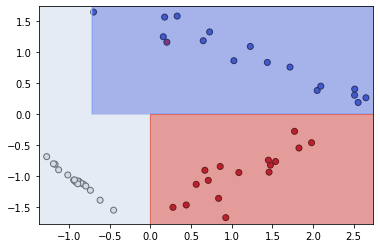

In [74]:
xx, yy = np.meshgrid(
    np.arange(xyz[:,0].min() - 0.1, xyz[:,0].max() + 0.1, 0.01), 
    np.arange(xyz[:,1].min() - 0.1, xyz[:,1].max() + 0.1 , 0.01)
)

yhat = model.predict(np.c_[xx.flatten(), yy.flatten()])

plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.contourf(xx, yy, yhat.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.show()

## CatBoost
- Gradient Boosting

In [75]:
!pip install catboost

     |████████████████████████████████| 65.7 MB 19 kB/s s eta 0:00:01   |███▏                            | 6.5 MB 2.4 MB/s eta 0:00:25     |███████▎                        | 14.9 MB 2.4 MB/s eta 0:00:21     |█████████▊                      | 19.9 MB 22.3 MB/s eta 0:00:03
     |████████████████████████████████| 13.2 MB 66.2 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=488c6efda2c39fc3a41294fd255f1db8e2d4bfbc7752eb4ec2d3c90ec33c5d55
  Stored in directory: /root/.cache/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [8]:
import catboost as cb

model = cb.CatBoostClassifier(
    max_depth=16,
    learning_rate=0.01,
    n_estimators=1000,
    # eval_metric='Accuracy',
    loss_function='MultiClass'
    # objective='MultiClass'
).fit(xyz, xyz_labels)

0:	learn: 1.0919474	total: 57.2ms	remaining: 57.1s
1:	learn: 1.0809478	total: 57.6ms	remaining: 28.7s
2:	learn: 1.0750041	total: 62ms	remaining: 20.6s
3:	learn: 1.0704791	total: 245ms	remaining: 1m 1s
4:	learn: 1.0632670	total: 246ms	remaining: 49s
5:	learn: 1.0572638	total: 251ms	remaining: 41.6s
6:	learn: 1.0495106	total: 252ms	remaining: 35.8s
7:	learn: 1.0431670	total: 256ms	remaining: 31.8s
8:	learn: 1.0346083	total: 257ms	remaining: 28.3s
9:	learn: 1.0271242	total: 258ms	remaining: 25.5s
10:	learn: 1.0222411	total: 321ms	remaining: 28.9s
11:	learn: 1.0174959	total: 438ms	remaining: 36.1s
12:	learn: 1.0075349	total: 439ms	remaining: 33.3s
13:	learn: 1.0039441	total: 776ms	remaining: 54.7s
14:	learn: 0.9993147	total: 793ms	remaining: 52.1s
15:	learn: 0.9924367	total: 794ms	remaining: 48.8s
16:	learn: 0.9871387	total: 802ms	remaining: 46.3s
17:	learn: 0.9825465	total: 816ms	remaining: 44.5s
18:	learn: 0.9771828	total: 844ms	remaining: 43.6s
19:	learn: 0.9705834	total: 848ms	remainin

KeyboardInterrupt: 

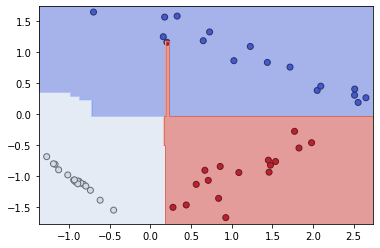

In [87]:
xx, yy = np.meshgrid(
    np.arange(xyz[:,0].min() - 0.1, xyz[:,0].max() + 0.1, 0.01), 
    np.arange(xyz[:,1].min() - 0.1, xyz[:,1].max() + 0.1 , 0.01)
)

yhat = model.predict(np.c_[xx.flatten(), yy.flatten()])

plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.contourf(xx, yy, yhat.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.show()

# 앙상블의 앙상블

In [9]:
bagging_predict = []
for _ in range(10):
    #bootstrapping
    idx = [x for x in range(X.shape[0])]
    bagging_idx = np.random.choice(idx, size=40, replace=False) #비복원 추출
    train = X[bagging_idx]
    model = cb.CatBoostRegressor(
        max_depth=16,
        learning_rate=0.01,
        n_estimators=500,
        loss_function='RMSE', 
        verbose=0
    ).fit(X, Y)
    predict = model.predict(newX)
    bagging_predict.append(predict)

In [11]:
display(len(bagging_predict))
len(bagging_predict[0])

10

1000

In [16]:
mean_predict = []

for i in range(newX.shape[0]): # 1000
    tmp = []
    for bag in bagging_predict:
        tmp.append(bag[i])
    mean_predict.append(np.mean(tmp))

In [17]:
len(mean_predict)

1000

In [18]:
mean_predict

[1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.723643196502826,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.7652702218170588,
 1.8352054643489706,
 1.8352054643489706,
 1.8352054643489706,
 1.8352054643489706,
 1.8352054643489706,
 1.8352054643489706,
 1.8352054643489706,
 1.835205464

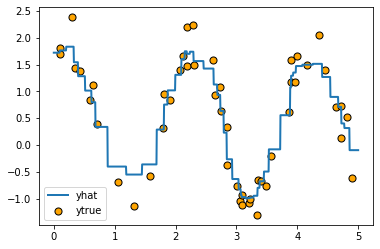

In [19]:
plt.scatter(X, Y, s=50, edgecolors='black', c='orange', label='ytrue')
plt.plot(newX, mean_predict, label='yhat', linewidth=2)
plt.legend()
plt.show()